In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS
import re
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
[feature for feature in df.columns if df[feature].isnull().sum()>1]

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [8]:
feature_na = []
for feature in df.columns:
    if df[feature].isnull().sum()>1:
        feature_na.append(feature)
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
df['rate'].isnull().sum()/len(df['rate'])*100

15.033741322969234

In [10]:
for feature in feature_na:
    print('{} has {} missing values '.format(feature,np.round(df[feature].isnull().sum()/len(df[feature])*100,4)))

rate has 15.0337 missing values 
phone has 2.3358 missing values 
location has 0.0406 missing values 
rest_type has 0.4389 missing values 
dish_liked has 54.2916 missing values 
cuisines has 0.087 missing values 
approx_cost(for two people) has 0.669 missing values 


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [12]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [13]:
df[df['approx_cost(for two people)'].isnull()]

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

In [14]:
df['approx_cost(for two people)'].unique

<bound method Series.unique of 0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 51717, dtype: object>

In [15]:
###Lambda

In [16]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [17]:
def remove_comma(x):
    return x.replace(',','')

In [18]:
df['approx_cost(for two people)'].astype(str).apply(remove_comma)

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [19]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [20]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [21]:
df['rate'].dtype

dtype('O')

In [22]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
df['rate'].isnull().sum()

7775

In [24]:
df['rate'][0].split('/')[0]

'4.1'

In [25]:
def split(x):
    return x.split('/')[0]
        

In [26]:
df['rate']=df['rate'].astype(str).apply(split)

In [27]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [28]:
df['rate'].replace('-',0,inplace=True)
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('nan',0,inplace=True)

In [29]:
df['rate'].astype(float).dtype

dtype('float64')

In [30]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

<AxesSubplot:>

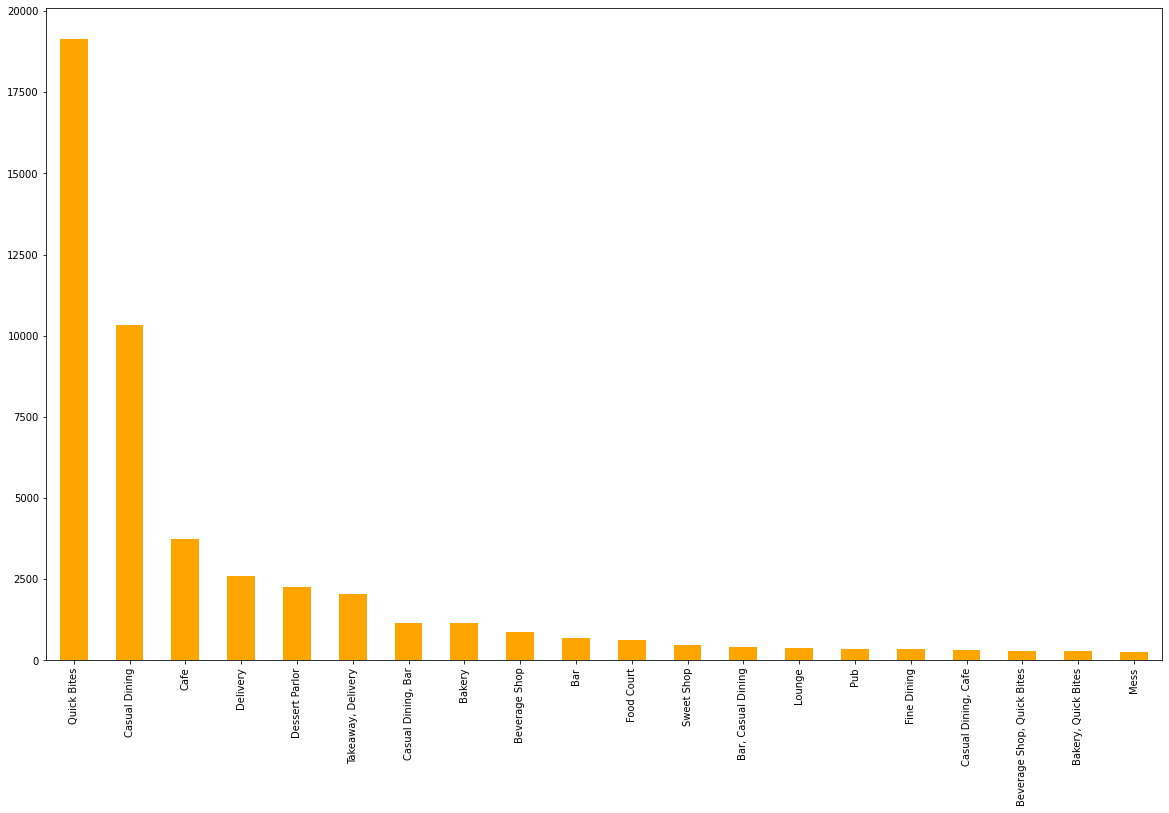

In [31]:
df['rest_type'].value_counts().nlargest(20).plot.bar(color='orange',figsize = (20,12))

In [32]:
def mark(x):
    if x in ('Quick Bites','Casual Dining'):
        return "Quick Bites + Casual Dining"
    else:
        return 'others'

In [33]:
df['top_type']=df['rest_type'].apply(mark)

In [34]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                     top_type  
0          Buffet    Banashankari  Quick Bites + Casual Dining  
1          Buffet    Banashankari  Quick Bites + Casual Dining  
2          Buffet    Banashankari                       others  
3          Buffet    Banashankari  Quick Bites + Casual Dining  
4          Buffet    Banashankari  Quick Bites + Casual Dining

In [35]:
values=df['top_type'].value_counts().values

In [36]:
labels=df['top_type'].value_counts().index 

In [37]:
fig=px.pie(df,names=labels,values=values)
fig.show()

In [38]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type'],
      dtype='object')

In [39]:
df['rate']=df['rate'].astype(float)
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
top_type                        object
dtype: object

In [40]:
rest=df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
rest

name  votes  url  \
0                                     #FeelTheROLL     14    2   
1                                       #L-81 Cafe    432    9   
2                                    #Vibes Restro      0    3   
3                                          #refuel    111    3   
4                           'Brahmins' Thatte Idli      0    1   
...                                            ...    ...  ...   
8787                                       late100      0    5   
8788                                       nu.tree   1443    8   
8789  re:cess - Hilton Bangalore Embassy GolfLinks    438    3   
8790                                    repEAT Hub      0    2   
8791                                     sCoolMeal      0    5   

      approx_cost(for two people)   rate  
0                           200.0  3.400  
1                           400.0  3.900  
2                           700.0  0.000  
3                           400.0  3.700  
4                           100.0  0.000  
...                           ...    ...  
8787                        200.0  0.000  
8788                        400.0  3.775  
8789                       1200.0  4.100  
8790                        200.0  0.000  
8791                        300.0  0.000  

[8792 rows x 5 columns]

In [41]:
rest.columns=['name','total_votes','total_unities','avg_approx_cost','mean_rating']
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  
0          3.4  
1          3.9  
2          0.0  
3          3.7  
4          0.0

In [42]:
rest['votes_per_unity']=rest['total_votes']/rest['total_unities']

In [43]:
rest

name  total_votes  \
0                                     #FeelTheROLL           14   
1                                       #L-81 Cafe          432   
2                                    #Vibes Restro            0   
3                                          #refuel          111   
4                           'Brahmins' Thatte Idli            0   
...                                            ...          ...   
8787                                       late100            0   
8788                                       nu.tree         1443   
8789  re:cess - Hilton Bangalore Embassy GolfLinks          438   
8790                                    repEAT Hub            0   
8791                                     sCoolMeal            0   

      total_unities  avg_approx_cost  mean_rating  votes_per_unity  
0                 2            200.0        3.400            7.000  
1                 9            400.0        3.900           48.000  
2                 3            700.0        0.000            0.000  
3                 3            400.0        3.700           37.000  
4                 1            100.0        0.000            0.000  
...             ...              ...          ...              ...  
8787              5            200.0        0.000            0.000  
8788              8            400.0        3.775          180.375  
8789              3           1200.0        4.100          146.000  
8790              2            200.0        0.000            0.000  
8791              5            300.0        0.000            0.000  

[8792 rows x 6 columns]

In [44]:
popular=rest.sort_values(by='total_unities',ascending=False)
popular 

name  total_votes  total_unities  \
1320                   Cafe Coffee Day         3089             96   
5549                            Onesta       347520             85   
3788                         Just Bake         2898             73   
2446                 Empire Restaurant       229808             71   
2577                 Five Star Chicken         3134             70   
...                                ...          ...            ...   
1900                        Cool Break           11              1   
8076       The Shake Factory Originals            8              1   
5216        Nethravathi Military Hotel            0              1   
7426  Swadisht North Indian Restaurant           23              1   
5375                Night Punjabi Folk            0              1   

      avg_approx_cost  mean_rating  votes_per_unity  
1320       844.791667     2.917708        32.177083  
5549       600.000000     4.410588      4088.470588  
3788       400.000000     3.126027        39.698630  
2446       685.211268     3.916901      3236.732394  
2577       257.857143     3.327143        44.771429  
...               ...          ...              ...  
1900       150.000000     3.400000        11.000000  
8076       200.000000     3.300000         8.000000  
5216       200.000000     0.000000         0.000000  
7426       200.000000     3.200000        23.000000  
5375       200.000000     0.000000         0.000000  

[8792 rows x 6 columns]

In [45]:
popular.shape


(8792, 6)

In [46]:
popular['name'].nunique()

8792

In [47]:
### avg votes rec by rest
### Top 5 most voted rest
### Top 5 less voted rest

Text(0.5, 1.0, 'Top 5 least voted restaurant')

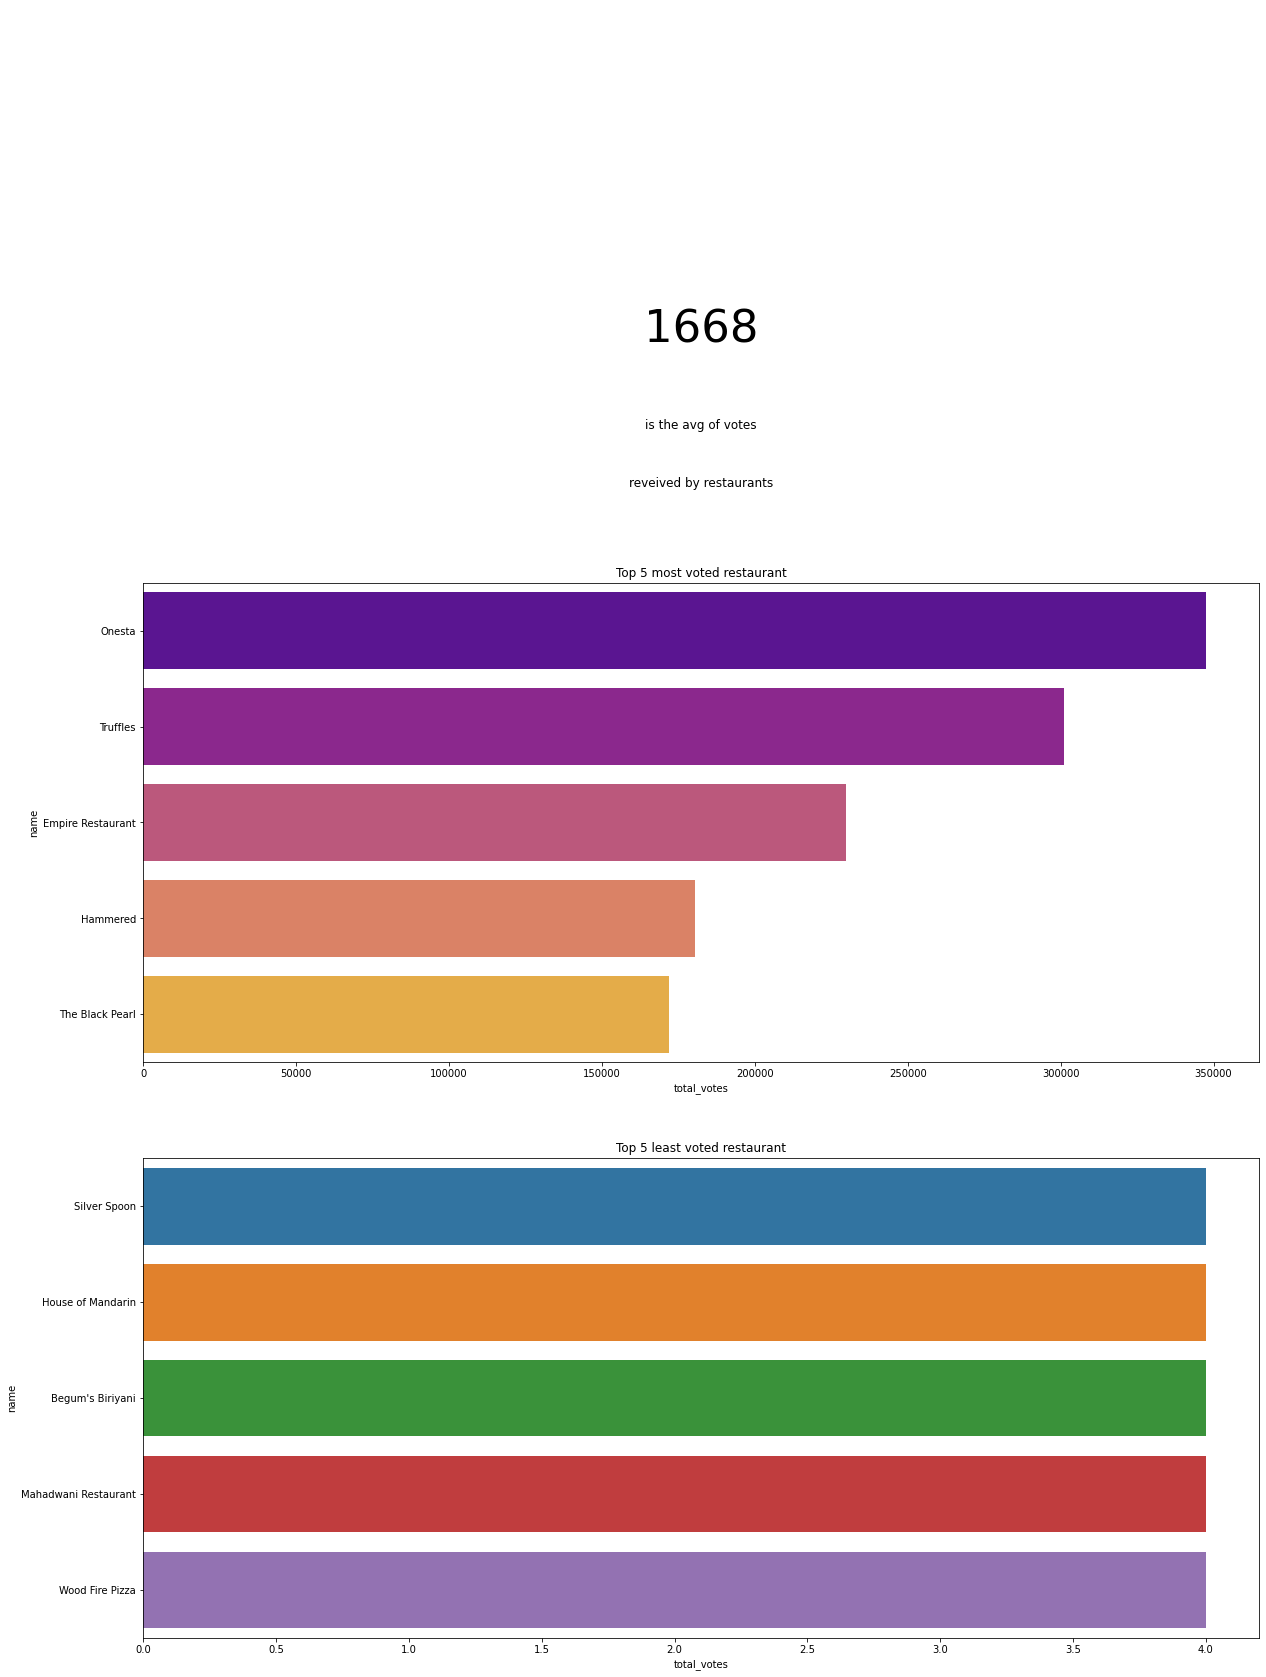

In [48]:
fig,(ax1,ax2,ax3) =plt.subplots(3,1,figsize=(20,30))
ax1.text(0.5,0.3,int(popular['total_votes'].mean()), fontsize=45, ha='center')
ax1.text(0.5,0.12,'is the avg of votes',fontsize=12, ha='center')
ax1.text(0.5,0,'reveived by restaurants',fontsize=12, ha='center')
ax1.axis('off')

sn.barplot(x='total_votes',y='name',data=popular.sort_values(by='total_votes',ascending =False).query('total_votes>0').head(),ax=ax2,palette='plasma')
ax2.set_title("Top 5 most voted restaurant")
sn.barplot(x='total_votes',y='name',data=popular.sort_values(by='total_votes',ascending =False).query('total_votes>0').tail(),ax=ax3)
ax3.set_title("Top 5 least voted restaurant")

Text(0.5, 1.0, 'Top 5 least cheap restaurant')

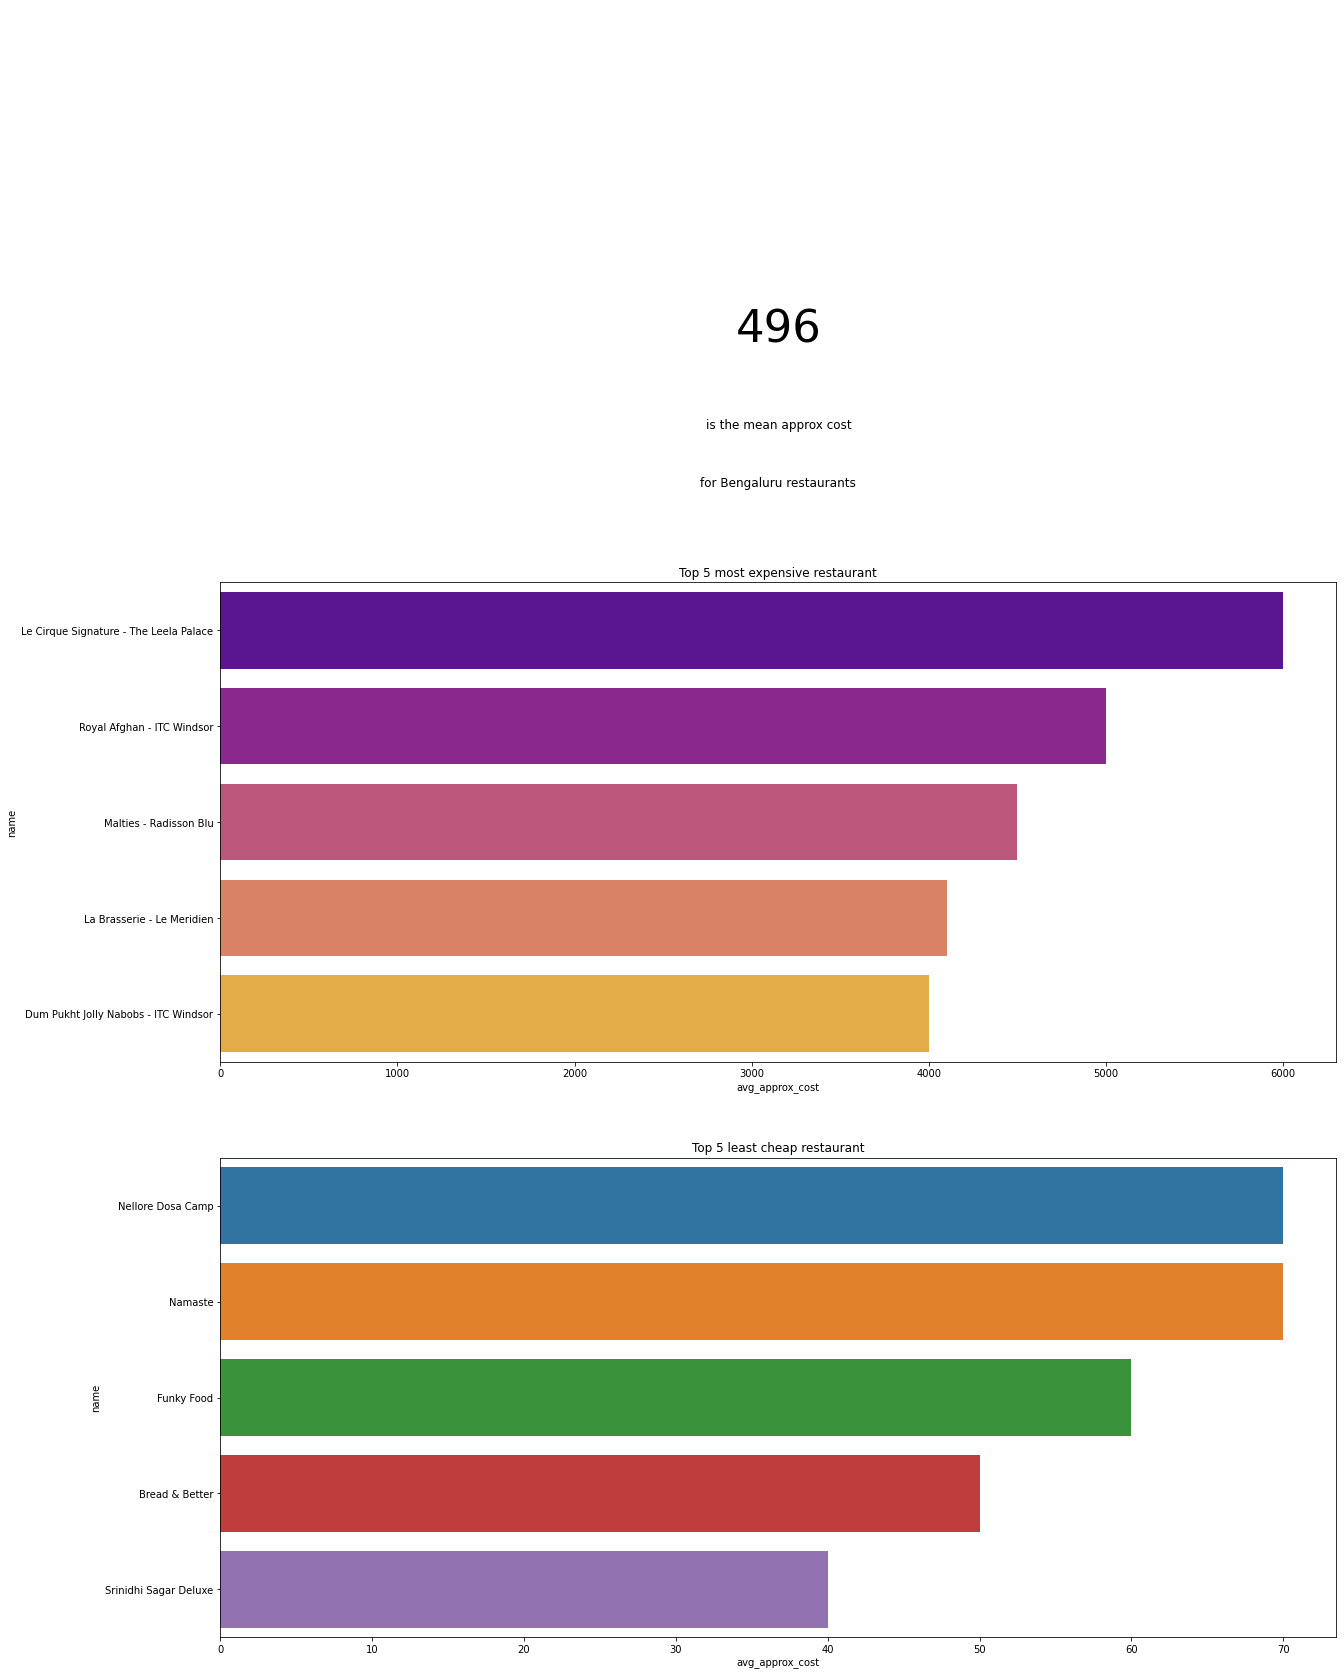

In [49]:
fig,(ax1,ax2,ax3) =plt.subplots(3,1,figsize=(20,30))
ax1.text(0.5,0.3,int(popular['avg_approx_cost'].mean()), fontsize=45, ha='center')
ax1.text(0.5,0.12,'is the mean approx cost',fontsize=12, ha='center')
ax1.text(0.5,0,'for Bengaluru restaurants',fontsize=12, ha='center')
ax1.axis('off')

sn.barplot(x='avg_approx_cost',y='name',data=popular.sort_values(by='avg_approx_cost',ascending =False).query('avg_approx_cost>0').head(),ax=ax2,palette='plasma')
ax2.set_title("Top 5 most expensive restaurant")
sn.barplot(x='avg_approx_cost',y='name',data=popular.sort_values(by='avg_approx_cost',ascending =False).query('avg_approx_cost>0').tail(),ax=ax3)
ax3.set_title("Top 5 least cheap restaurant")

In [50]:
x=df['book_table'].value_counts()
labels=['not book','book']


In [51]:
trace=go.Pie(labels=labels, values=x,hoverinfo = 'label+percent',textinfo='percent')
iplot([trace])

In [52]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
fig = px.pie(df,values=x,names=labels,title="Pie Chart")
fig.show()

In [53]:
filter = (df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
budget = df[filter]
budget.head()

url  \
928  https://www.zomato.com/bangalore/hiyar-majhe-k...   
934  https://www.zomato.com/bangalore/swadista-aaha...   
940  https://www.zomato.com/bangalore/swad-punjab-d...   
942  https://www.zomato.com/bangalore/roti-wala-btm...   
954  https://www.zomato.com/bangalore/litti-twist-b...   

                                               address                 name  \
928  57/1, Near Alliance University, 19th Cross, 7t...  Hiyar Majhe Kolkata   
934     947, 16th Main Road, 2nd Stage, BTM, Bangalore       Swadista Aahar   
940  324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...       Swad Punjab Da   
942  688, 7th Main, 10th Cross Main Road, 2nd Stage...            Roti Wala   
954  No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...          Litti Twist   

    online_order book_table  rate  votes                               phone  \
928          Yes         No   4.0    244  +91 9108919806\r\r\n+91 9739059571   
934          Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
940          Yes         No   4.0    126                      +91 8360151853   
942          Yes         No   4.0    197                      +91 9731100002   
954          Yes         No   4.1    464                      +91 8884270523   

    location    rest_type                                         dish_liked  \
928      BTM  Quick Bites  Radhaballavi, Biryani, Egg Noodles, Egg Roll, ...   
934      BTM  Quick Bites  Panneer Butter Masala, Idli, Masala Dosa, Vada...   
940      BTM  Quick Bites    Lassi, Roti, Veg Thali, Aloo Paratha, Egg Curry   
942      BTM  Quick Bites  Gulab Jamun, Buttermilk, Egg Bhurji, Sprout Sa...   
954      BTM  Quick Bites  Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...   

                                             cuisines  \
928                             Bengali, North Indian   
934  South Indian, North Indian, Chinese, Street Food   
940                                      North Indian   
942                                      North Indian   
954                              North Indian, Bihari   

     approx_cost(for two people)  \
928                        400.0   
934                        300.0   
940                        150.0   
942                        300.0   
954                        300.0   

                                          reviews_list  \
928  [('Rated 4.0', 'RATED\n  I like this restauran...   
934  [('Rated 3.0', "RATED\n  Ordered south Indian ...   
940  [('Rated 4.0', 'RATED\n  If you can visit and ...   
942  [('Rated 5.0', 'RATED\n  Well, I never had a c...   
954  [('Rated 4.0', "RATED\n  It's a great outlet t...   

                                             menu_item listed_in(type)  \
928                                                 []        Delivery   
934                                                 []        Delivery   
940  ['Dal with Sabji Combo', 'Dal Sabji with 4 Cha...        Delivery   
942                                                 []        Delivery   
954                                                 []        Delivery   

       listed_in(city)                     top_type  
928  Bannerghatta Road  Quick Bites + Casual Dining  
934  Bannerghatta Road  Quick Bites + Casual Dining  
940  Bannerghatta Road  Quick Bites + Casual Dining  
942  Bannerghatta Road  Quick Bites + Casual Dining  
954  Bannerghatta Road  Quick Bites + Casual Dining

In [54]:
budget['name'].unique()

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [55]:
def return_budget(location,restaurant_type):
    filter = (df['approx_cost(for two people)']<=400) & (df['location']==location) & (df['rate']>=4) & (df['rest_type']==restaurant_type)
    budget = df[filter]
    return (budget['name'].unique())

In [56]:
return_budget('BTM',"Quick Bites")

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [57]:
## lat, lon
## geographical analysis, spatial analysis


In [58]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                     top_type  
0          Buffet    Banashankari  Quick Bites + Casual Dining  
1          Buffet    Banashankari  Quick Bites + Casual Dining  
2          Buffet    Banashankari                       others  
3          Buffet    Banashankari  Quick Bites + Casual Dining  
4          Buffet    Banashankari  Quick Bites + Casual Dining

In [59]:
!pip install geopy

In [60]:
from geopy.geocoders import Nominatim

In [61]:
geolocator=Nominatim(user_agent = 'app')

In [62]:
data = df['name'][0]
data

'Jalsa'

In [63]:
data=geolocator.geocode(data)

In [64]:
data.latitude

12.9775851

In [65]:
data.longitude

77.6954241

In [66]:
df['location'].nunique()

93

In [67]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [68]:
lat = []
lon = []


for location in locations["Name"]:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [69]:
locations['latitude']=lat
locations['longitude']=lon


In [70]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [71]:
Rest_locations=df['location'].value_counts().reset_index()
Rest_locations.columns = ['Name','Count']
Rest_locations

Name  Count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88         West Bangalore      6
89              Yelahanka      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [72]:
Restaurant_locations=Rest_locations.merge(locations,on='Name').dropna()
Restaurant_locations

Name  Count   latitude   longitude
0                     BTM   5124  45.954851 -112.496595
1                     HSR   2523  18.147500   41.538889
2   Koramangala 5th Block   2504  12.934377   77.628415
3                JP Nagar   2235  12.265594   76.646540
4              Whitefield   2144  44.373058  -71.611858
..                    ...    ...        ...         ...
88         West Bangalore      6  13.001129   77.632562
89              Yelahanka      6  13.100698   77.596345
90                 Jakkur      3  13.078474   77.606894
91   Rajarajeshwari Nagar      2  12.927441   77.515522
92                 Peenya      1  13.032942   77.527325

[92 rows x 4 columns]

In [73]:
basemap=folium.Map(location=[12.97,77.59])
basemap

In [74]:
HeatMap(data=Restaurant_locations[['latitude',
                                  'longitude',
                                  'Count']]).add_to(basemap)
basemap

In [75]:
## wordcloud -- 100 words, ## is,am,are

In [76]:
data=df[df['rest_type']=='Quick Bites']
data.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                     top_type  
3     Banashankari  Quick Bites + Casual Dining  
31    Banashankari  Quick Bites + Casual Dining  
34    Banashankari  Quick Bites + Casual Dining  
36    Banashankari  Quick Bites + Casual Dining  
39    Banashankari  Quick Bites + Casual Dining

In [77]:
data['dish_liked'][3].split()

['Masala', 'Dosa']

In [78]:
data['dish_liked'].isnull().sum()

13843

In [79]:
dishes=''
for word in data['dish_liked'].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    dishes=dishes + ' '.join(words) + ' '


In [80]:
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

In [81]:
stopwords=set(STOPWORDS)

In [82]:
wordcloud=WordCloud(stopwords=stopwords,width=3000,height=3000,).generate(dishes)

(-0.5, 2999.5, 2999.5, -0.5)

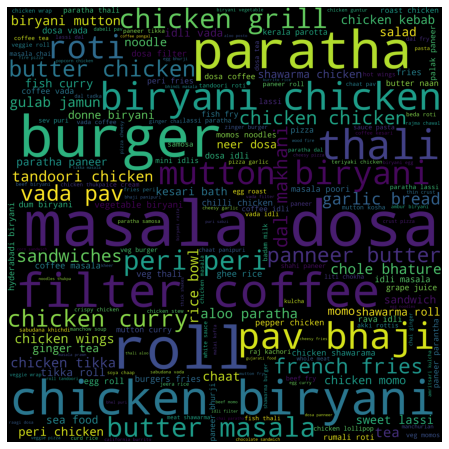

In [83]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

In [84]:
data=df['reviews_list'][0]
data

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [85]:
data = data.lower()

In [86]:
data2 = re.sub('[^a-zA-z]',' ',data)
data2

'[  rated        rated\\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated\\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers      rated        rated\\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly

In [87]:
data3 = re.sub('rated',' ',data2)
data3

'[            \\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                 \\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers                \\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians 

In [88]:
data4 = re.sub('x',' ',data3)
data4

'[            \\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                 \\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers                \\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians 

In [89]:
data5=re.sub(' +',' ',data4)
data5

'[ \\n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again \\n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout \\ncheers \\n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come f

In [90]:
dataset=df[df['rest_type']=='Quick Bites']
dataset.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                     top_type  
3     Banashankari  Quick Bites + Casual Dining  
31    Banashankari  Quick Bites + Casual Dining  
34    Banashankari  Quick Bites + Casual Dining  
36    Banashankari  Quick Bites + Casual Dining  
39    Banashankari  Quick Bites + Casual Dining

In [91]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-z]',' ',review)
    review=re.sub('rated',' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review +str(review)

In [92]:
wordcloud2=WordCloud(stopwords=stopwords,width=3000,height=3000,).generate(total_review)

(-0.5, 2999.5, 2999.5, -0.5)

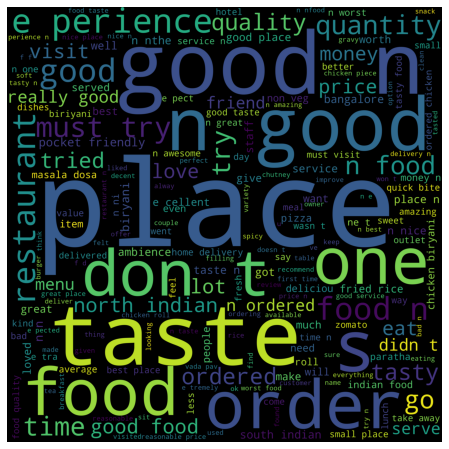

In [93]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud2)
plt.axis('off')

In [94]:
### df -- 2
### new_rest --- rating =0
### train_val_rest - >0 -- ML Model

In [95]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0

In [96]:
df['rated']=df['rate'].apply(assign)

In [97]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated'],
      dtype='object')

In [98]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [99]:
new_rest = df[df['rated']==0]
train_val_rest = df.query('rated==1')



In [100]:
train_val_rest.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                     top_type  rated  
0          Buffet    Banashankari  Quick Bites + Casual Dining      1  
1          Buffet    Banashankari  Quick Bites + Casual Dining      1  
2          Buffet    Banashankari                       others      1  
3          Buffet    Banashankari  Quick Bites + Casual Dining      1  
4          Buffet    Banashankari  Quick Bites + Casual Dining      1

In [101]:
train_val_rest['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [102]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated'],
      dtype='object')

In [103]:
## target -- ?
## zomato -- domain expertise
##rest < 3.75 bad --0
##rest > 3.75 good --1
###lambda -- fun

In [104]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [105]:
train_val_rest['target']=train_val_rest['rate'].apply(lambda x:1 if x>=3.75 else 0)

In [106]:
train_val_rest.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                     top_type  rated  target  
0          Buffet    Banashankari  Quick Bites + Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites + Casual Dining      1       1  
2          Buffet    Banashankari                       others      1       1  
3          Buffet    Banashankari  Quick Bites + Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites + Casual Dining      1       1

In [107]:
x= train_val_rest['target'].value_counts()
x

0    21421
1    20244
Name: target, dtype: int64

In [108]:
labels = x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x22f480d1e08>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

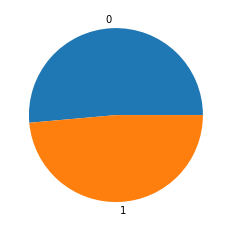

In [109]:
plt.pie(x,labels=labels)

In [110]:
train_val_rest.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated', 'target'],
      dtype='object')

In [111]:
## n --k features

In [112]:
len(train_val_rest['cuisines'][0].split(','))

3

In [113]:
def count(x):
    return len(x.split(','))
    

In [114]:
train_val_rest['total_cuisines']=train_val_rest['cuisines'].astype(str).apply(count)

In [115]:
train_val_rest.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  ...                        cuisines  \
0  Banashankari        Casual Dining  ...  North Indian, Mughlai, Chinese   
1  Banashankari        Casual Dining  ...     Chinese, North Indian, Thai   
2  Banashankari  Cafe, Casual Dining  ...          Cafe, Mexican, Italian   
3  Banashankari          Quick Bites  ...      South Indian, North Indian   
4  Basavanagudi        Casual Dining  ...        North Indian, Rajasthani   

  approx_cost(for two people)  \
0                       800.0   
1                       800.0   
2                       800.0   
3                       300.0   
4                       600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                     top_type rated  target  \
0          Buffet    Banashankari  Quick Bites + Casual Dining     1       1   
1          Buffet    Banashankari  Quick Bites + Casual Dining     1       1   
2          Buffet    Banashankari                       others     1       1   
3          Buffet    Banashankari  Quick Bites + Casual Dining     1       0   
4          Buffet    Banashankari  Quick Bites + Casual Dining     1       1   

   total_cuisines  
0               3  
1               3  
2               3  
3               2  
4               2  

[5 rows x 21 columns]

In [116]:
train_val_rest['multiple_types']=train_val_rest['rest_type'].astype(str).apply(count)
train_val_rest.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  ... approx_cost(for two people)  \
0  Banashankari        Casual Dining  ...                       800.0   
1  Banashankari        Casual Dining  ...                       800.0   
2  Banashankari  Cafe, Casual Dining  ...                       800.0   
3  Banashankari          Quick Bites  ...                       300.0   
4  Basavanagudi        Casual Dining  ...                       600.0   

                                        reviews_list  menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...         []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...         []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...         []   
3  [('Rated 4.0', "RATED\n  Great food and proper...         []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...         []   

  listed_in(type) listed_in(city)                     top_type rated target  \
0          Buffet    Banashankari  Quick Bites + Casual Dining     1      1   
1          Buffet    Banashankari  Quick Bites + Casual Dining     1      1   
2          Buffet    Banashankari                       others     1      1   
3          Buffet    Banashankari  Quick Bites + Casual Dining     1      0   
4          Buffet    Banashankari  Quick Bites + Casual Dining     1      1   

   total_cuisines  multiple_types  
0               3               1  
1               3               1  
2               3               2  
3               2               1  
4               2               1  

[5 rows x 22 columns]

In [117]:
train_val_rest.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [118]:
imp_features=['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)','listed_in(type)', 'listed_in(city)', 'target',
       'total_cuisines', 'multiple_types']

In [119]:
data=train_val_rest[imp_features]

In [120]:
data.shape

(41665, 10)

In [121]:
data.head()

online_order book_table      location            rest_type  \
0          Yes        Yes  Banashankari        Casual Dining   
1          Yes         No  Banashankari        Casual Dining   
2          Yes         No  Banashankari  Cafe, Casual Dining   
3           No         No  Banashankari          Quick Bites   
4           No         No  Basavanagudi        Casual Dining   

   approx_cost(for two people) listed_in(type) listed_in(city)  target  \
0                        800.0          Buffet    Banashankari       1   
1                        800.0          Buffet    Banashankari       1   
2                        800.0          Buffet    Banashankari       1   
3                        300.0          Buffet    Banashankari       0   
4                        600.0          Buffet    Banashankari       1   

   total_cuisines  multiple_types  
0               3               1  
1               3               1  
2               3               2  
3               2               1  
4               2               1

In [122]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
multiple_types                   0
dtype: int64

In [123]:
data.dropna(how='any',inplace=True)

In [124]:
data.shape

(41271, 10)

In [125]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
multiple_types                   int64
dtype: object

In [126]:
cat_col=[col for col in data.columns if data[col].dtype == 'O']
cat_col

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [127]:
num_col=[col for col in data.columns if data[col].dtype != 'O']
num_col

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [128]:
for feature in cat_col:
    print('{} has total {} unique features'.format(feature,data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [129]:
## feature encoding --
## one hot encoding --
## 


In [130]:
values=data['location'].value_counts()/len(data) *100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [131]:
threshold=0.4
imp=values[values>threshold]
imp.nunique()

45

In [132]:
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')

In [133]:
data['location'].nunique()

47

In [134]:
values2=data['rest_type'].value_counts()/len(data) *100
values2


Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Dessert Parlor, Food Court     0.004846
Bakery, Food Court             0.004846
Cafe, Food Court               0.004846
Quick Bites, Kiosk             0.002423
Bakery, Beverage Shop          0.002423
Name: rest_type, Length: 87, dtype: float64

In [135]:
threshold=1.5
imp2=values2[values2>threshold]
len(imp2)

10

In [136]:
data['rest_type'].head(20)

0           Casual Dining
1           Casual Dining
2     Cafe, Casual Dining
3             Quick Bites
4           Casual Dining
5           Casual Dining
6           Casual Dining
7     Casual Dining, Cafe
8                    Cafe
9                    Cafe
10                   Cafe
11                   Cafe
12                   Cafe
13                   Cafe
14    Cafe, Casual Dining
15                   Cafe
16                   Cafe
17                   Cafe
18                   Cafe
19                   Cafe
Name: rest_type, dtype: object

In [137]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')

In [138]:
data['rest_type'].head(20)

0     Casual Dining
1     Casual Dining
2             other
3       Quick Bites
4     Casual Dining
5     Casual Dining
6     Casual Dining
7             other
8              Cafe
9              Cafe
10             Cafe
11             Cafe
12             Cafe
13             Cafe
14            other
15             Cafe
16             Cafe
17             Cafe
18             Cafe
19             Cafe
Name: rest_type, dtype: object

In [139]:
for feature in cat_col:
    print('{} has total {} unique features'.format(feature,data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [140]:
data_cat=data[cat_col]

In [141]:
for col in cat_col:
    col_encoded=pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col,axis=1,inplace=True)
    
    

In [142]:
data_cat.shape

(41271, 93)

In [143]:
data_cat.head()

online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                   0                           0                      0   
1                   0                           0                      0   
2                   0                           0                      0   
3                   0                           0                      0   
4                   0                           0                      1   

   location_Bellandur  location_Brigade Road  location_Brookefield  \
0                   0                      0                     0   
1                   0                      0                     0   
2                   0                      0                     0   
3                   0                      0                     0   
4                   0                      0                     0   

   location_Church Street  ...  listed_in(city)_Lavelle Road  \
0                       0  ...                             0   
1                       0  ...                             0   
2                       0  ...                             0   
3                       0  ...                             0   
4                       0  ...                             0   

   listed_in(city)_MG Road  listed_in(city)_Malleshwaram  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   listed_in(city)_Marathahalli  listed_in(city)_New BEL Road  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_Old Airport Road  listed_in(city)_Rajajinagar  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   listed_in(city)_Residency Road  listed_in(city)_Sarjapur Road  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   listed_in(city)_Whitefield  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 93 columns]

In [144]:
num_col

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [145]:
data_final=pd.concat([data.loc[:,['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']],data_cat],axis=1)

In [146]:
data_final.head()

approx_cost(for two people)  target  total_cuisines  multiple_types  \
0                        800.0       1               3               1   
1                        800.0       1               3               1   
2                        800.0       1               3               2   
3                        300.0       0               2               1   
4                        600.0       1               2               1   

   online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  ...  \
0                   0                           0                      0  ...   
1                   0                           0                      0  ...   
2                   0                           0                      0  ...   
3                   0                           0                      0  ...   
4                   0                           0                      1  ...   

   listed_in(city)_Lavelle Road  listed_in(city)_MG Road  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   listed_in(city)_Malleshwaram  listed_in(city)_Marathahalli  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_New BEL Road  listed_in(city)_Old Airport Road  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   listed_in(city)_Rajajinagar  listed_in(city)_Residency Road  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   listed_in(city)_Sarjapur Road  listed_in(city)_Whitefield  
0                              0                           0  
1                              0                           0  
2                              0                           0  
3                              0                           0  
4                              0                           0  

[5 rows x 97 columns]

In [147]:
x=data_final.drop('target',axis=1)
y=data_final['target']

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [149]:
x_train.shape

(33016, 96)

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
clf = RandomForestClassifier()

In [152]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [153]:
predictions = clf.predict(x_test)

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [155]:
confusion_matrix(predictions,y_test)

array([[3499,  946],
       [ 753, 3057]], dtype=int64)

In [156]:
accuracy_score(predictions,y_test)

0.7941853422168382

In [157]:
!pip install xgboost 

In [158]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [159]:
models = []

models.append(('LogisticsRegresssion',LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('KNeighbors',KNeighborsClassifier()))
models.append(('XGboost',XGBClassifier()))


In [160]:
for name,model in models:
    print(name)
    print(model)

LogisticsRegresssion
LogisticRegression()
Naive Bayes
GaussianNB()
RandomForest
RandomForestClassifier()
Decision Tree
DecisionTreeClassifier()
KNeighbors
KNeighborsClassifier()
XGboost
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [161]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [162]:
for name,model in models:
    print(name)
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticsRegresssion
[[3424 1463]
 [ 828 2540]]
0.7224712295578437


Naive Bayes
[[3040 1460]
 [1212 2543]]
0.6763173834039976


RandomForest
[[3529  938]
 [ 723 3065]]
0.7987886129618413


Decision Tree
[[3640  814]
 [ 612 3189]]
0.8272562083585706


KNeighbors
[[3623 1006]
 [ 629 2997]]
0.8019382192610539


XGboost
[14:08:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[3691 1104]
 [ 561 2899]]
0.7983040581465778


